#### Importing the required libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings("ignore")

#### Reading the dataset

In [149]:
movieDF = pd.read_csv('movie_metadata.csv')
movieDF.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


#### Understanding the data

In [150]:
movieDF.shape

(5043, 28)

In [151]:
movieDF.describe(include='all')


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,5024,4939,4993.000000,5028.000000,4939.000000,5020.000000,5030,5036.000000,4.159000e+03,5043,...,5022.000000,5031,5038,4740,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
unique,2,2398,NaN,NaN,NaN,NaN,3032,NaN,NaN,914,...,NaN,47,65,18,NaN,NaN,NaN,NaN,NaN,NaN
top,Color,Steven Spielberg,NaN,NaN,NaN,NaN,Morgan Freeman,NaN,NaN,Drama,...,NaN,English,USA,R,NaN,NaN,NaN,NaN,NaN,NaN
freq,4815,26,NaN,NaN,NaN,NaN,20,NaN,NaN,236,...,NaN,4704,3807,2118,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,140.194272,107.201074,686.509212,645.009761,NaN,6560.047061,4.846841e+07,NaN,...,272.770808,NaN,NaN,NaN,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,NaN,NaN,121.601675,25.197441,2813.328607,1665.041728,NaN,15020.759120,6.845299e+07,NaN,...,377.982886,NaN,NaN,NaN,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,NaN,NaN,1.000000,7.000000,0.000000,0.000000,NaN,0.000000,1.620000e+02,NaN,...,1.000000,NaN,NaN,NaN,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,NaN,NaN,50.000000,93.000000,7.000000,133.000000,NaN,614.000000,5.340988e+06,NaN,...,65.000000,NaN,NaN,NaN,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,NaN,NaN,110.000000,103.000000,49.000000,371.500000,NaN,988.000000,2.551750e+07,NaN,...,156.000000,NaN,NaN,NaN,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,NaN,NaN,195.000000,118.000000,194.500000,636.000000,NaN,11000.000000,6.230944e+07,NaN,...,326.000000,NaN,NaN,NaN,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000


In [152]:
movieDF.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

#### Missing values

In [153]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
missing_values_table(movieDF)

Your selected dataframe has 28 columns.
There are 21 columns that have missing values.


,Missing Values,% of Total Values
gross,884,17.5
budget,492,9.8
aspect_ratio,329,6.5
content_rating,303,6.0
plot_keywords,153,3.0
title_year,108,2.1
director_name,104,2.1
director_facebook_likes,104,2.1
num_critic_for_reviews,50,1.0
actor_3_name,23,0.5


In [192]:
fig = px.box(movieDF, x='budget')
fig.show()

#### Function to check the random imputation

In [155]:
def checkrandomImpute(df,targetColumn,imputedColumn):
    X=df.drop(columns=[targetColumn])
    y=df[targetColumn]
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)
    outputColumnName = imputedColumn + 'Imputed'
    X_train[outputColumnName]=X_train[imputedColumn]
    X_test[outputColumnName]=X_test[imputedColumn]
    nullMaskTrain = X_train[outputColumnName].isnull()
    nullMaskTest = X_test[outputColumnName].isnull()
    X_train[outputColumnName][nullMaskTrain] = X_train[imputedColumn].dropna().sample(nullMaskTrain.sum()).values
    X_test[outputColumnName][nullMaskTest] = X_train[imputedColumn].dropna().sample(nullMaskTest.sum()).values
  
    
    ## Figures
    plt.figure(figsize=(5,5))
    
    sns.kdeplot(X_train[imputedColumn],label = 'Original')
    sns.kdeplot(X_train[outputColumnName],label = 'Imputed')
    plt.legend()
    plt.show()
  

    X_train[[imputedColumn,outputColumnName]].boxplot(figsize = (5,5)) 

#### Separating object types variables and numeric type varibales into different dataframes

In [156]:
movieDFNum = movieDF.select_dtypes(include = ['float64', 'int64'])
movieDFObj = movieDF.select_dtypes(include = ['object'])
#movieDFNum = movieDFNum.drop(['budget'],axis = 1)
missingCols = movieDFNum.columns[movieDFNum.isna().any()].tolist()

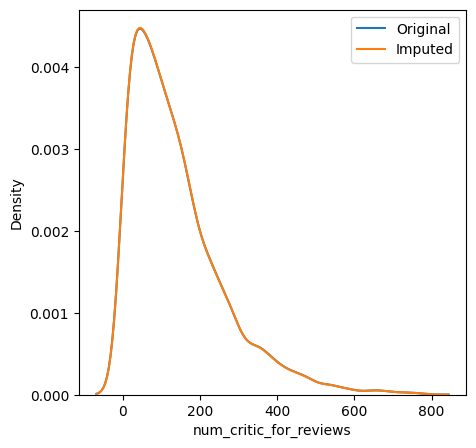

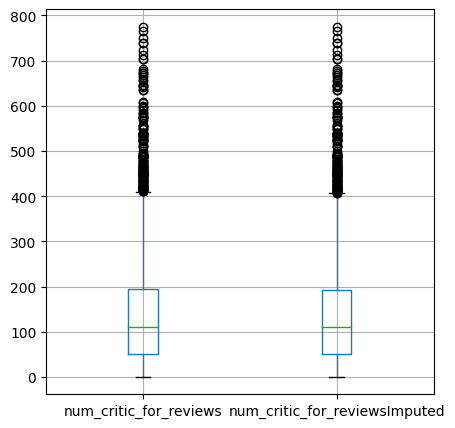

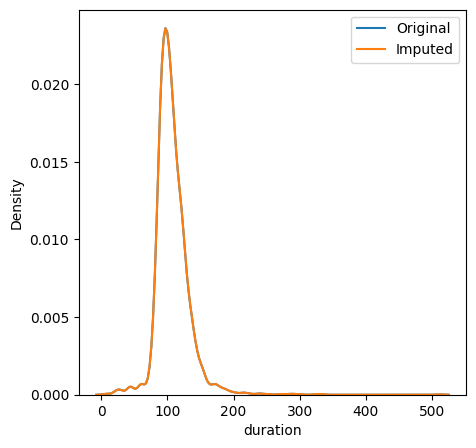

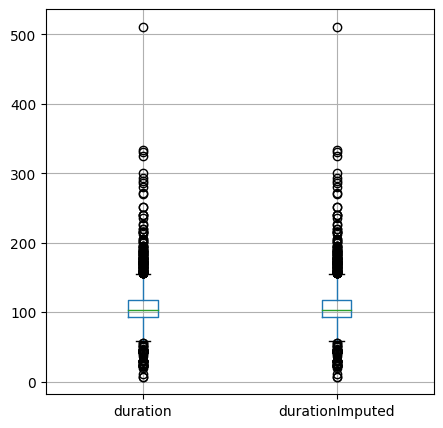

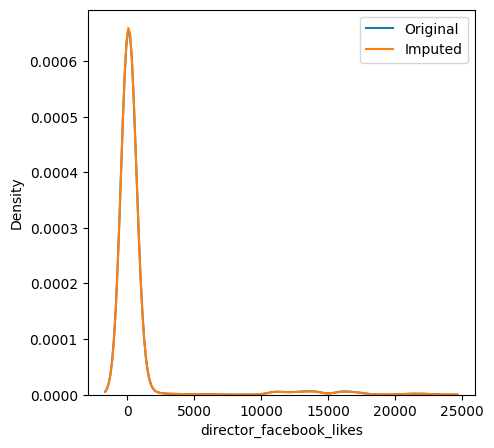

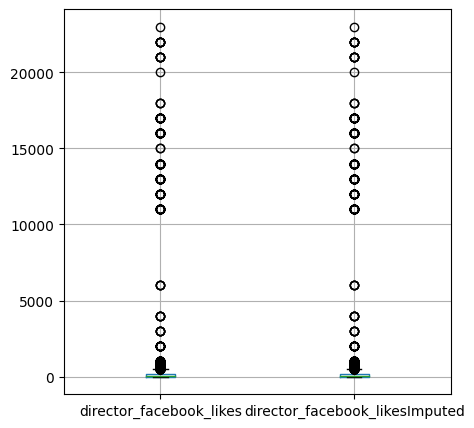

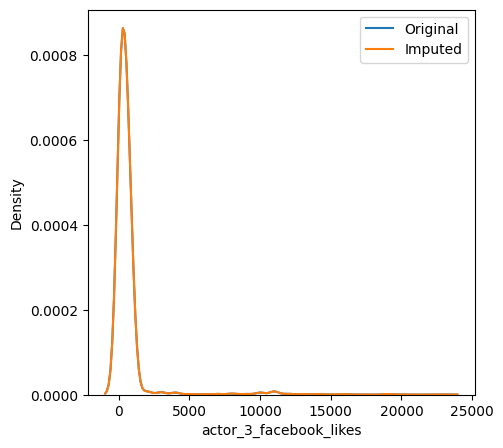

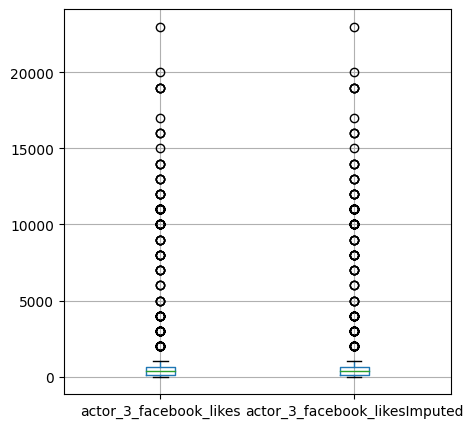

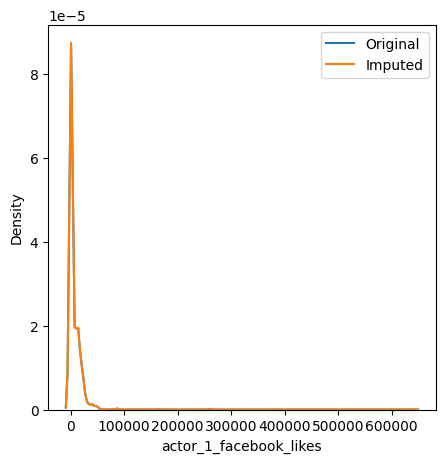

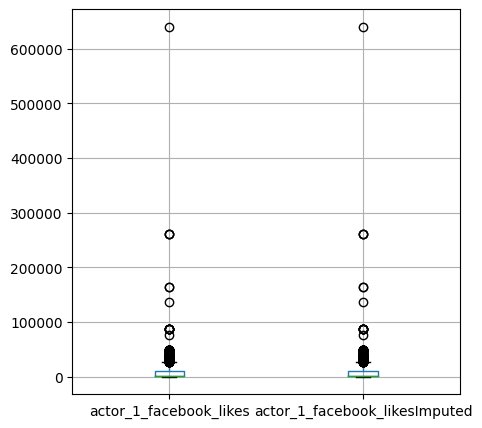

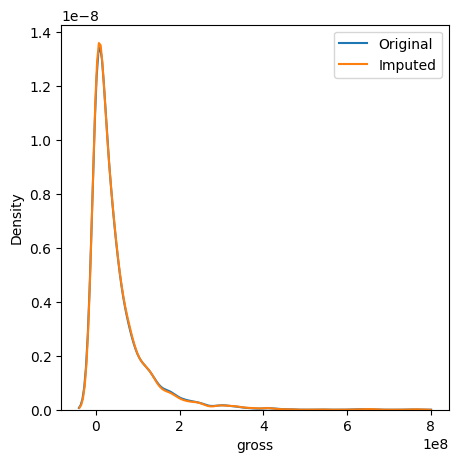

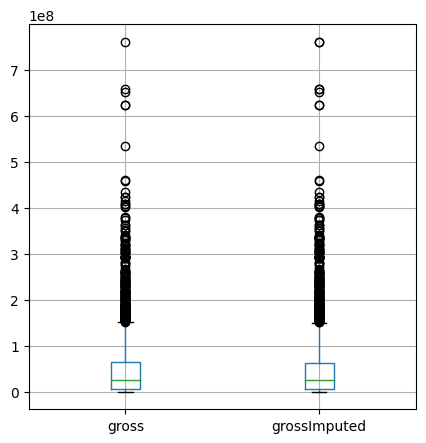

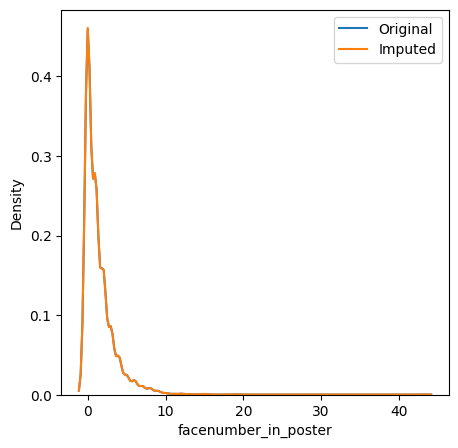

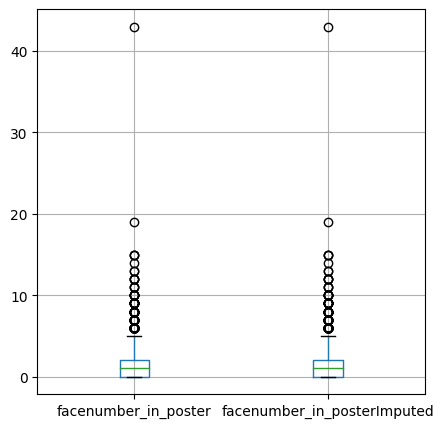

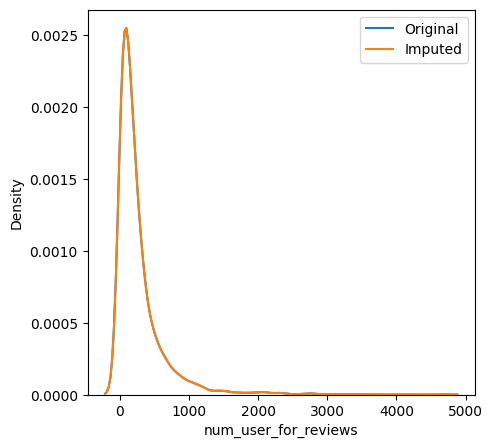

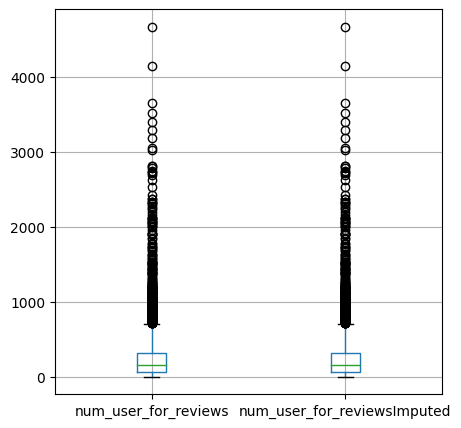

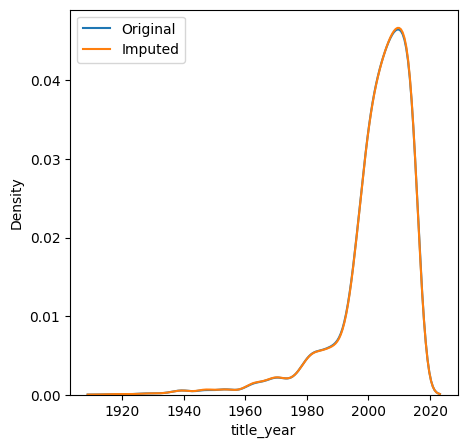

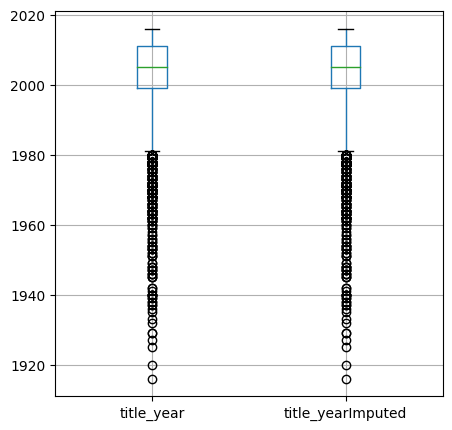

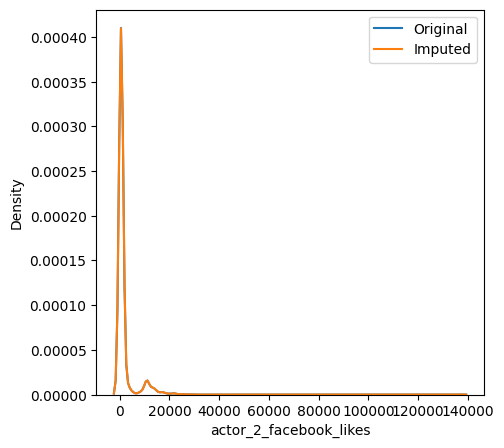

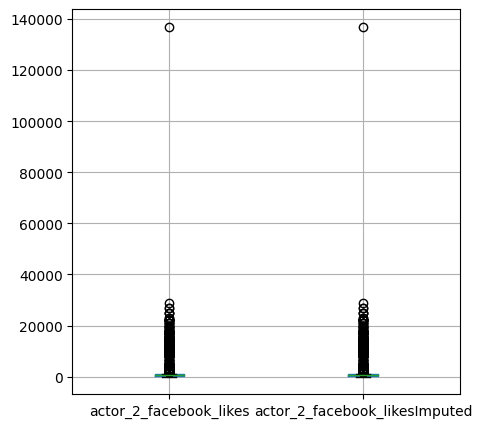

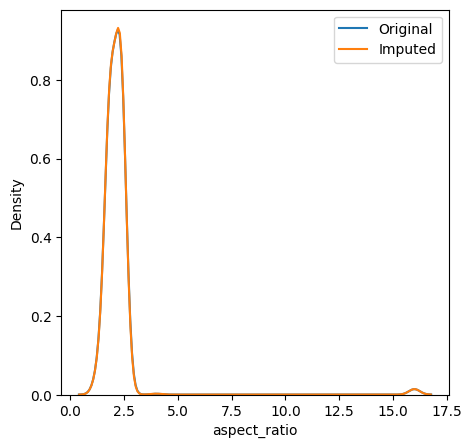

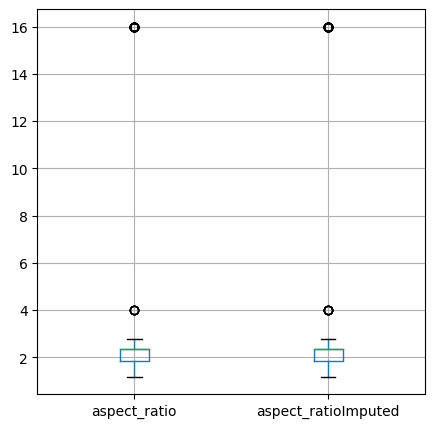

In [157]:
for i in missingCols:
    if (i != 'budget'):
        checkrandomImpute(movieDFNum,'budget',i)
        

#### As we can see from the plots that our data distribution is not changing by doing the random imputation. So we can proceed with it.

In [158]:
for i in missingCols:
    if (i != 'budget'):
        doRandomImpute(movieDFNum,'budget',i)
        

In [159]:
missing_values_table(movieDFNum)

Your selected dataframe has 16 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
budget,492,9.8


In [160]:
updatedMovie = pd.concat([movieDFNum,movieDFObj],axis=1)

In [161]:
updatedMovie

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,...,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,Wes Studi,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,...,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,PG-13
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,...,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,PG-13
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,...,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,PG-13
4,9.0,90.0,131.0,826.0,131.0,8373585.0,8,143,0.0,185.0,...,Rob Walker,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,1.0,87.0,2.0,318.0,637.0,22531698.0,629,2283,2.0,6.0,...,Daphne Zuniga,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,Crystal Lowe,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,English,Canada,NaN
5039,43.0,43.0,0.0,319.0,841.0,5204007.0,73839,1753,1.0,359.0,...,Valorie Curry,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,Sam Underwood,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,English,USA,TV-14
5040,13.0,76.0,0.0,0.0,0.0,28563926.0,38,0,0.0,3.0,...,Maxwell Moody,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,David Chandler,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,English,USA,NaN
5041,14.0,100.0,0.0,489.0,946.0,10443.0,1255,2386,5.0,9.0,...,Daniel Henney,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,Eliza Coupe,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,English,USA,PG-13


In [162]:
missing_values_table(updatedMovie)

Your selected dataframe has 28 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
budget,492,9.8
content_rating,303,6.0
plot_keywords,153,3.0
director_name,104,2.1
actor_3_name,23,0.5
color,19,0.4
actor_2_name,13,0.3
language,12,0.2
actor_1_name,7,0.1
country,5,0.1


In [163]:
updatedMovie = updatedMovie.dropna(subset=['content_rating','plot_keywords','director_name','actor_3_name','color','actor_2_name','language','actor_1_name','country'])
updatedMovie.shape

(4581, 28)

In [164]:
missing_values_table(updatedMovie)

Your selected dataframe has 28 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
budget,317,6.9


In [165]:
updatedMovie.dtypes

num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_1_facebook_likes       float64
gross                        float64
num_voted_users                int64
cast_total_facebook_likes      int64
facenumber_in_poster         float64
num_user_for_reviews         float64
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
movie_facebook_likes           int64
color                         object
director_name                 object
actor_2_name                  object
genres                        object
actor_1_name                  object
movie_title                   object
actor_3_name                  object
plot_keywords                 object
movie_imdb_link               object
language                      object
country                       object
c

#### Using Ordinal Encoder for encoding the object type columns

In [166]:
ord_encoder = OrdinalEncoder()
updatedMovie[['colorLabel','director_nameLabel','actor_2_nameLabel','genresLabel','actor_1_nameLabel','movie_titleLabel','actor_3_nameLabel','plot_keywordsLabel','movie_imdb_linkLabel','languageLabel','countryLabel','content_ratingLabel']] = ord_encoder.fit_transform(updatedMovie[['color','director_name','actor_2_name','genres','actor_1_name','movie_title','actor_3_name','plot_keywords','movie_imdb_link','language','country','content_rating']])
updatedMovie

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,actor_2_nameLabel,genresLabel,actor_1_nameLabel,movie_titleLabel,actor_3_nameLabel,plot_keywordsLabel,movie_imdb_linkLabel,languageLabel,countryLabel,content_ratingLabel
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,...,1244.0,98.0,230.0,345.0,3095.0,1241.0,2837.0,9.0,53.0,7.0
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,...,1958.0,92.0,869.0,2459.0,1234.0,4019.0,2618.0,9.0,53.0,7.0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,...,2205.0,119.0,306.0,2949.0,2815.0,1956.0,4232.0,9.0,52.0,7.0
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,...,465.0,269.0,1709.0,3348.0,1568.0,3286.0,3562.0,9.0,53.0,7.0
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,...,2258.0,117.0,388.0,1757.0,2426.0,611.0,2387.0,9.0,53.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5034,35.0,80.0,0.0,0.0,0.0,70071.0,589,0,0.0,35.0,...,744.0,848.0,669.0,654.0,2439.0,4220.0,2527.0,9.0,39.0,5.0
5035,56.0,81.0,0.0,6.0,121.0,2040920.0,52055,147,0.0,130.0,...,2038.0,188.0,239.0,1054.0,606.0,1116.0,595.0,32.0,53.0,9.0
5036,127.0,84.0,2.0,2.0,45.0,172825435.0,36,93,0.0,1.0,...,1260.0,672.0,1437.0,3720.0,2698.0,4216.0,2536.0,9.0,53.0,7.0
5037,14.0,95.0,0.0,133.0,296.0,4584.0,1338,690,1.0,14.0,...,372.0,574.0,964.0,2267.0,668.0,4456.0,4019.0,9.0,53.0,5.0


#### Applying linear regression to fill the missing values in price column

In [167]:
updatedMovieNum = updatedMovie.select_dtypes(include = ['float64', 'int64'])
test_data = updatedMovieNum[updatedMovieNum['budget'].isnull()]
test_data
train_data = updatedMovieNum.dropna()
train_data


X_train = train_data.drop('budget',axis=1)
y_train = train_data['budget']

lr = LinearRegression()
lr.fit(X_train,y_train)

X_test = test_data.drop('budget',axis=1)
X_test

y_pred = lr.predict(X_test)
len(y_pred)

317

In [168]:
y_pred.shape

(317,)

In [169]:
test_data.loc[test_data.budget.isnull(),'budget'] = y_pred

In [170]:
test_data

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,actor_2_nameLabel,genresLabel,actor_1_nameLabel,movie_titleLabel,actor_3_nameLabel,plot_keywordsLabel,movie_imdb_linkLabel,languageLabel,countryLabel,content_ratingLabel
55,298.0,93.0,113.0,113.0,275.0,123070338.0,62836,696,0.0,345.0,...,1050.0,285.0,1.0,3459.0,2403.0,927.0,4068.0,9.0,53.0,6.0
84,10.0,109.0,596.0,283.0,622.0,8326035.0,2138,1982,3.0,15.0,...,97.0,112.0,1655.0,3676.0,312.0,25.0,3539.0,9.0,5.0,9.0
422,84.0,123.0,189.0,87.0,813.0,5660084.0,19228,1476,0.0,146.0,...,238.0,599.0,1488.0,214.0,2059.0,3173.0,228.0,9.0,53.0,9.0
444,120.0,97.0,56.0,852.0,12000.0,82506325.0,27838,23907,0.0,102.0,...,1333.0,615.0,1627.0,679.0,2309.0,1418.0,2436.0,9.0,53.0,1.0
477,19.0,117.0,69.0,87.0,898.0,821997.0,666,1753,0.0,40.0,...,2382.0,794.0,1746.0,1030.0,2096.0,762.0,918.0,9.0,53.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,61.0,79.0,2.0,20.0,962.0,24705.0,1516,1054,0.0,10.0,...,1686.0,721.0,1814.0,3396.0,1561.0,3928.0,3504.0,9.0,53.0,13.0
5005,52.0,109.0,26.0,3.0,26.0,37188667.0,1578,38,0.0,23.0,...,1368.0,539.0,78.0,2206.0,1621.0,3903.0,2607.0,9.0,53.0,9.0
5007,53.0,93.0,214.0,59.0,177.0,9609.0,2646,365,4.0,22.0,...,2540.0,541.0,1215.0,971.0,732.0,1804.0,3695.0,9.0,52.0,9.0
5014,58.0,80.0,892.0,492.0,986.0,26284475.0,15091,3197,0.0,129.0,...,1374.0,206.0,1152.0,2572.0,2126.0,3260.0,3555.0,9.0,8.0,9.0


In [171]:
finalMovieDF = pd.concat([test_data,train_data])
finalMovieDF.isnull().sum()
finalMovieDF.shape

(4581, 28)

In [173]:
finalMovieDF[['color','director_name','actor_2_name','genres','actor_1_name','movie_title','actor_3_name','plot_keywords','movie_imdb_link','language','country','content_rating']] = ord_encoder.inverse_transform(finalMovieDF[['colorLabel','director_nameLabel','actor_2_nameLabel','genresLabel','actor_1_nameLabel','movie_titleLabel','actor_3_nameLabel','plot_keywordsLabel','movie_imdb_linkLabel','languageLabel','countryLabel','content_ratingLabel']])
finalMovieDF = finalMovieDF.drop(['colorLabel','director_nameLabel','actor_2_nameLabel','genresLabel','actor_1_nameLabel','movie_titleLabel','actor_3_nameLabel','plot_keywordsLabel','movie_imdb_linkLabel','languageLabel','countryLabel','content_ratingLabel'],axis=1)
finalMovieDF

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
55,298.0,93.0,113.0,113.0,275.0,123070338.0,62836,696,0.0,345.0,...,Jack McGraw,Adventure|Animation|Comedy|Family|Fantasy,A.J. Buckley,The Good Dinosaur,Peter Sohn,apatosaurus|asteroid|dinosaur|fear|river,http://www.imdb.com/title/tt1979388/?ref_=fn_t...,English,USA,PG
84,10.0,109.0,596.0,283.0,622.0,8326035.0,2138,1982,3.0,15.0,...,Alice Englert,Action|Adventure|Romance|Sci-Fi,Tamsin Egerton,The Lovers,Bipasha Basu,1770s|british india|great barrier reef|india|ring,http://www.imdb.com/title/tt1321869/?ref_=fn_t...,English,Belgium,R
422,84.0,123.0,189.0,87.0,813.0,5660084.0,19228,1476,0.0,146.0,...,Ben Vereen,Comedy|Drama|Music|Musical,Roy Scheider,All That Jazz,Max Wright,dancer|editing|stand up comedian|surgery|vomiting,http://www.imdb.com/title/tt0078754/?ref_=fn_t...,English,USA,R
444,120.0,97.0,56.0,852.0,12000.0,82506325.0,27838,23907,0.0,102.0,...,Julia Roberts,Comedy|Family|Fantasy,Steve Buscemi,Charlotte's Web,Oprah Winfrey,barn|pig|piglet|spider|uncle,http://www.imdb.com/title/tt0413895/?ref_=fn_t...,English,USA,G
477,19.0,117.0,69.0,87.0,898.0,821997.0,666,1753,0.0,40.0,...,Stephen Dillane,Drama|Romance,Vanessa Redgrave,Déjà Vu,Michael Brandon,american|love|pin|ruby|stranger,http://www.imdb.com/title/tt0119033/?ref_=fn_t...,English,USA,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5034,35.0,80.0,0.0,0.0,0.0,70071.0,589,0,0.0,35.0,...,Edgar Tancangco,Thriller,Ian Gamazon,Cavite,Quynn Ton,jihad|mindanao|philippines|security guard|squa...,http://www.imdb.com/title/tt0428303/?ref_=fn_t...,English,Philippines,Not Rated
5035,56.0,81.0,0.0,6.0,121.0,2040920.0,52055,147,0.0,130.0,...,Peter Marquardt,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,Consuelo Gómez,assassin|death|guitar|gun|mariachi,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,Spanish,USA,R
5036,127.0,84.0,2.0,2.0,45.0,172825435.0,36,93,0.0,1.0,...,John Considine,Crime|Drama,Richard Jewell,The Mongol King,Sara Stepnicka,jewell|mongol|nostradamus|stepnicka|vallone,http://www.imdb.com/title/tt0430371/?ref_=fn_t...,English,USA,PG-13
5037,14.0,95.0,0.0,133.0,296.0,4584.0,1338,690,1.0,14.0,...,Caitlin FitzGerald,Comedy|Drama,Kerry Bishé,Newlyweds,Daniella Pineda,written and directed by cast member,http://www.imdb.com/title/tt1880418/?ref_=fn_t...,English,USA,Not Rated


In [174]:
missing_values_table(finalMovieDF)

Your selected dataframe has 28 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


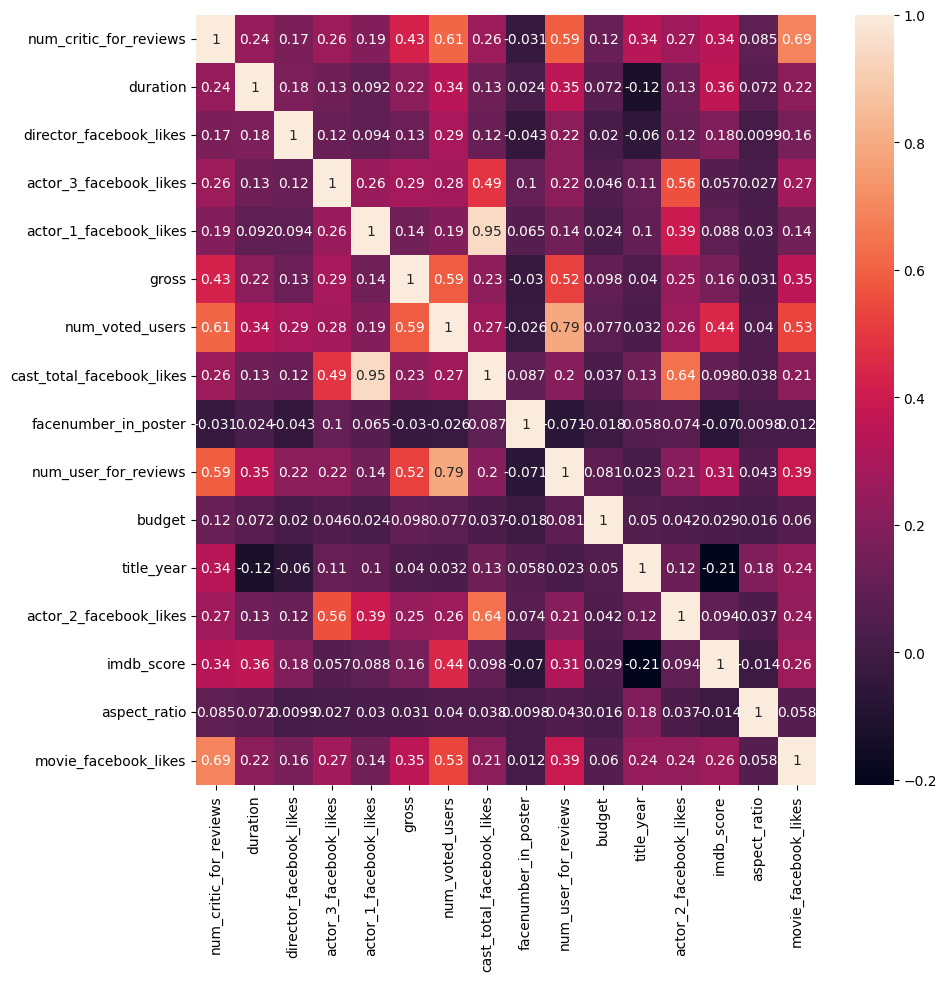

In [176]:
plt.figure(figsize=(10,10))
sns.heatmap(finalMovieDF.corr(),annot=True);

<AxesSubplot: >

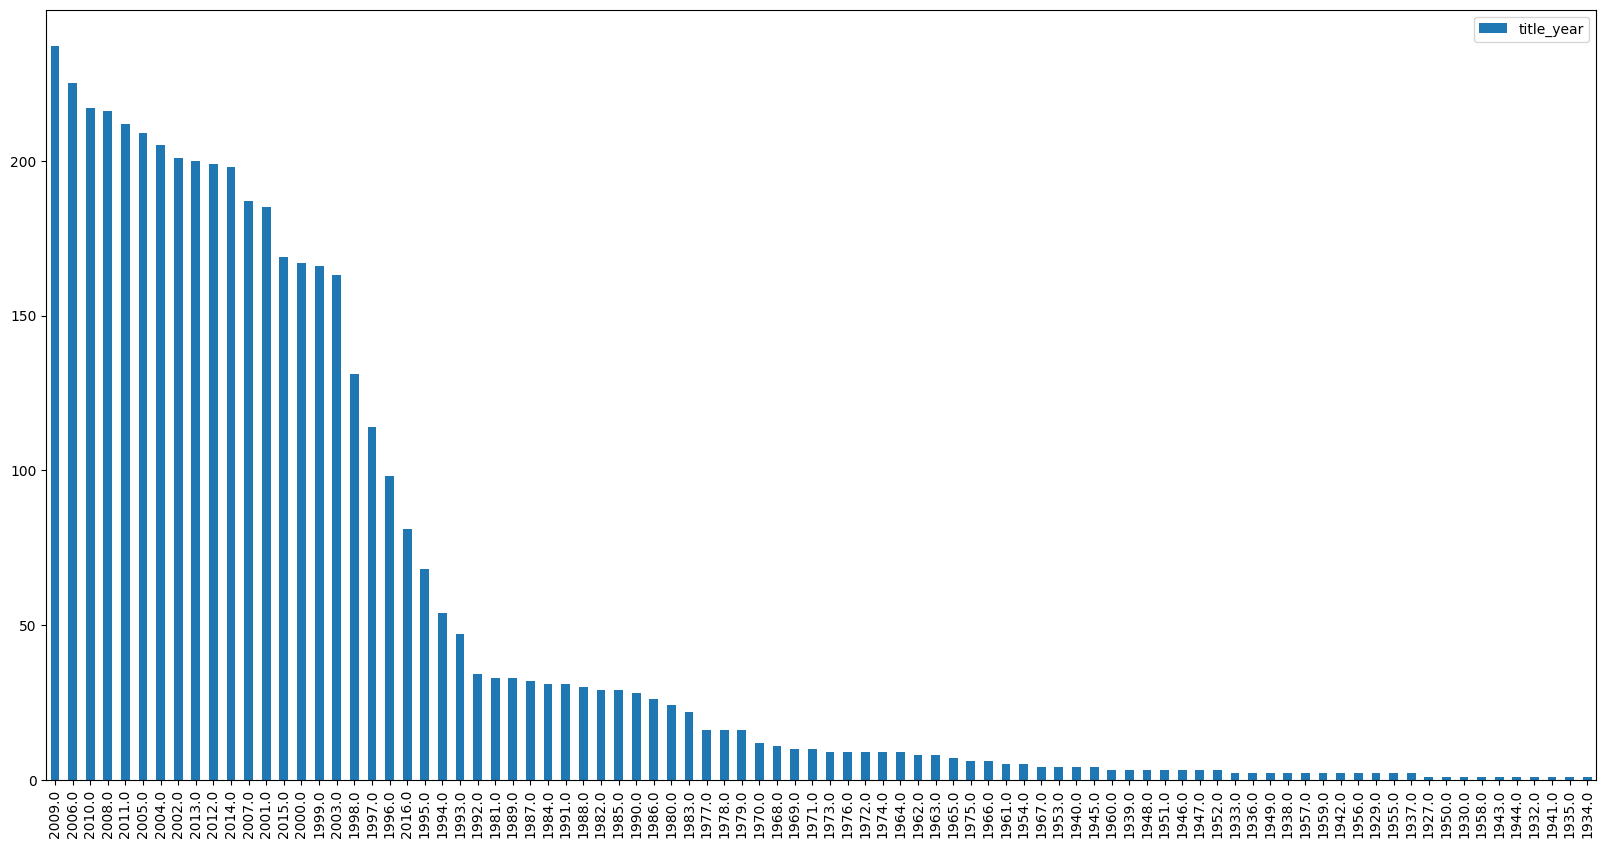

In [198]:
pd.DataFrame(finalMovieDF['title_year'].value_counts(sort=True)).plot(kind='bar',figsize=(20,10))

<AxesSubplot: >

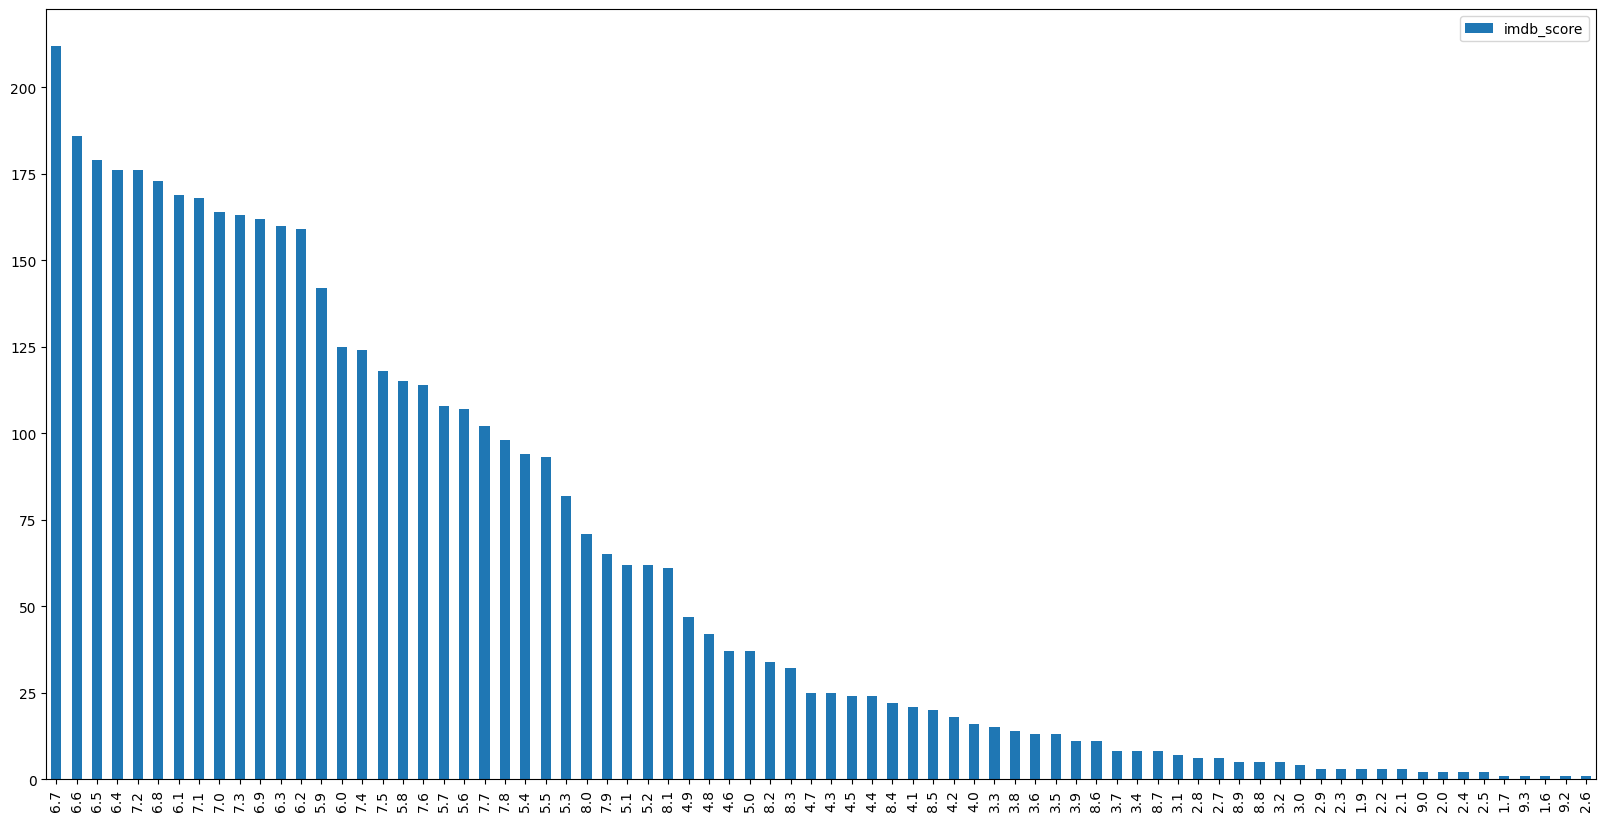

In [199]:
pd.DataFrame(finalMovieDF['imdb_score'].value_counts(sort=True)).plot(kind='bar',figsize=(20,10))

In [244]:
fbLikes=finalMovieDF[['title_year','movie_facebook_likes']].groupby(['title_year']).mean()


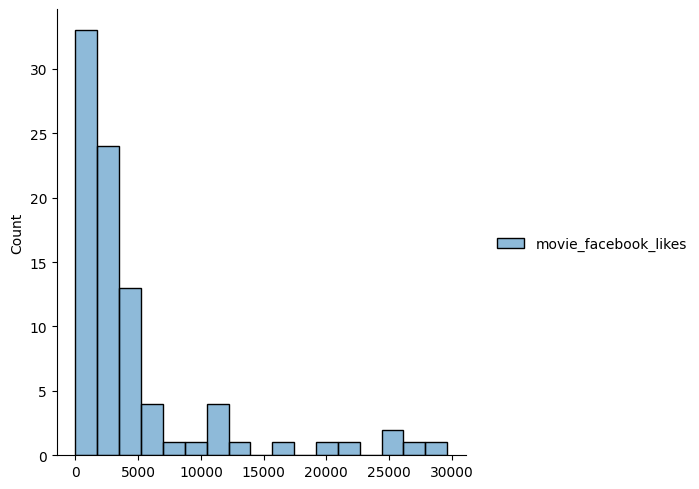

In [245]:
sns.displot(fbLikes)

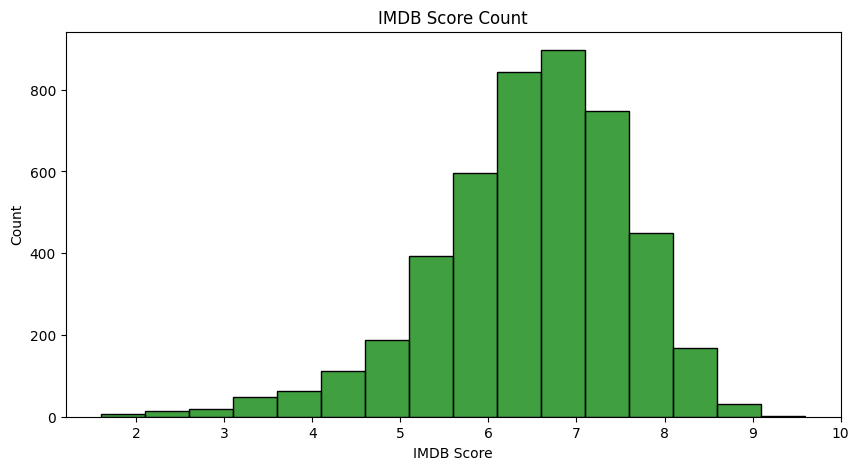

In [256]:
plt.figure(figsize=(10,5))
plt.title('IMDB Score Count')
plt.xlabel('IMDB Score')
sns.histplot(data=finalMovieDF,x='imdb_score',color='green',binwidth=0.5)
plt.show()

In [269]:
topTenMovies = finalMovieDF['movie_facebook_likes'].value_counts().reset_index().sort_values(by='movie_facebook_likes', ascending=False).head(10)
temp = []
for i in range(10):
    temp.append(finalMovieDF['movie_title'].iloc[[topTenMovies.index[i]]].values)
movies = []
for i in range(10):
    movies.append(temp[i][0])
topTenMovies = pd.DataFrame(zip(movies, topTenMovies['movie_facebook_likes']), columns=['movies', 'likes'])
topTenMovies

,movies,likes
0,The Good Dinosaur,2073
1,The Lovers,102
2,All That Jazz,80
3,Charlotte's Web,77
4,Déjà Vu,61
5,The Edge,58
6,Carriers,52
7,The Finest Hours,51
8,Dinner for Schmucks,47
9,Wild Hogs,46


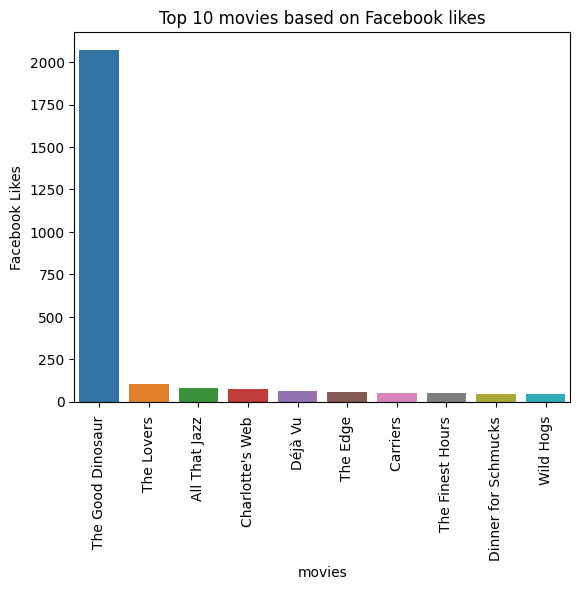

In [266]:
plt.title('Top 10 movies based on Facebook likes')
sns.barplot(data=topTenMovies, x='movies', y='likes')
plt.xticks(rotation=90)
plt.ylabel('Facebook Likes')
plt.show()

<AxesSubplot: >

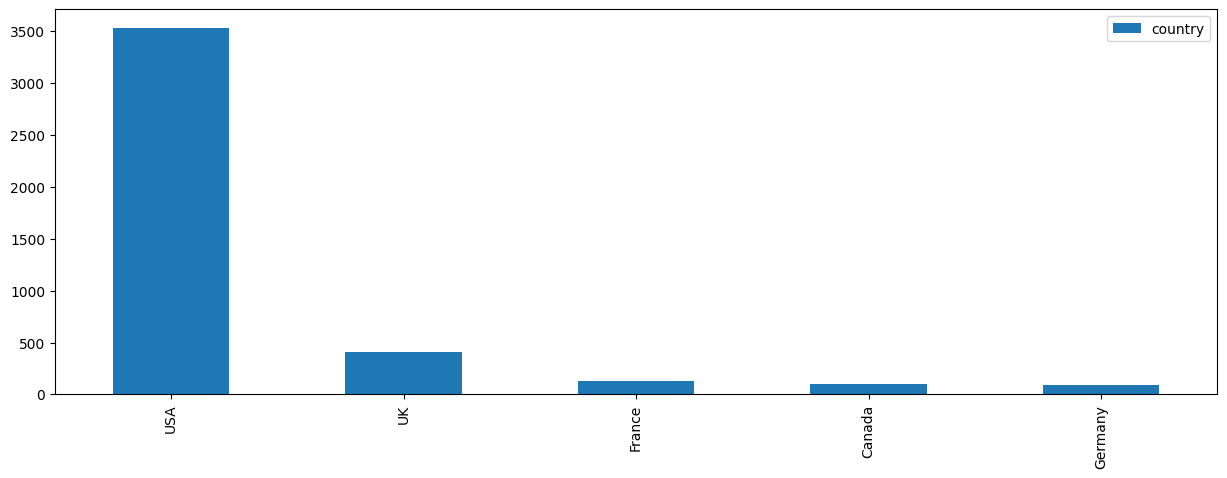

In [284]:
country = finalMovieDF['country'].value_counts(sort = True).head()
country
pd.DataFrame(country).plot(kind='bar',figsize=(15,5))

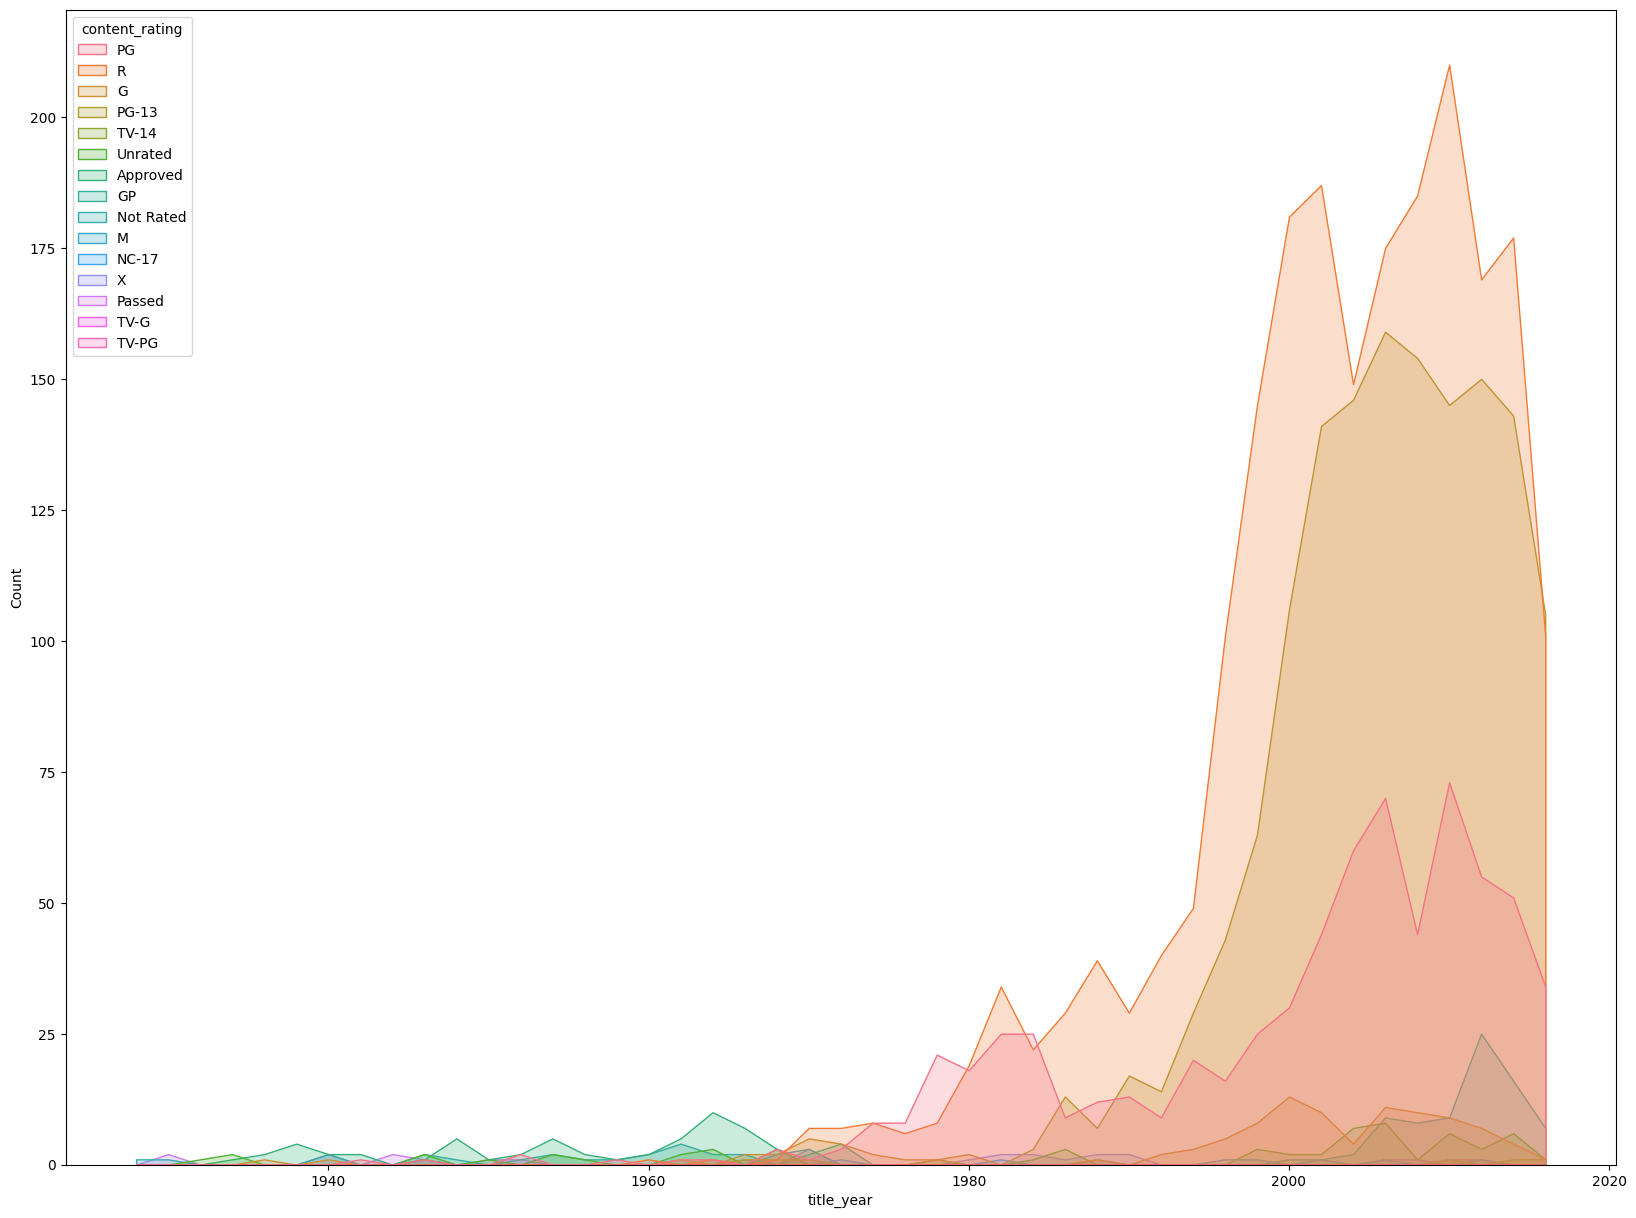

In [309]:
plt.figure(figsize=(20,15))
fig = sns.histplot(binwidth=2,
            x='title_year',
            hue='content_rating',
            data=finalMovieDF,
            stat="count",
            element = 'poly',
            color='red')
sns.move_legend(fig, "upper left")

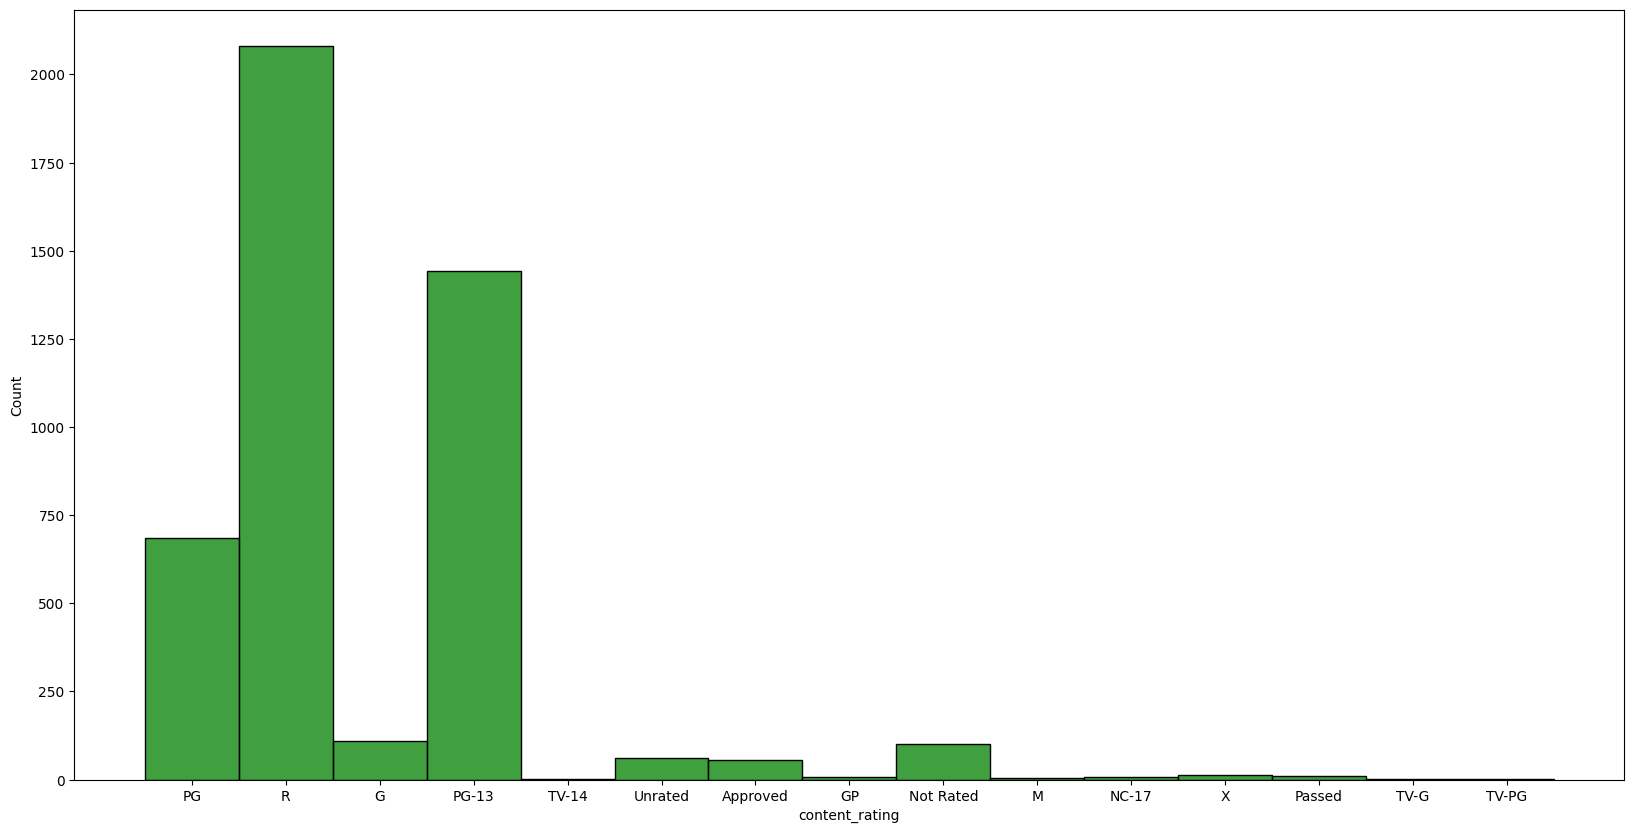

In [334]:
plt.figure(figsize=(20,10))
fig = sns.histplot(binwidth=2,
            x='content_rating',
            data=finalMovieDF,
            stat="count",
            element = 'bars',
            color='green')